<a href="https://colab.research.google.com/github/Fissureee/PCVK/blob/main/Jobsheet5PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


**1. Buat Gamma Correction sesuai dengan petunjuk berikut**

Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
dengan gamma correction sesuai rumus yang telah diberikan.

Gamma Correction pada citra
----------------------------------
Masukkan nilai Gamma: 3


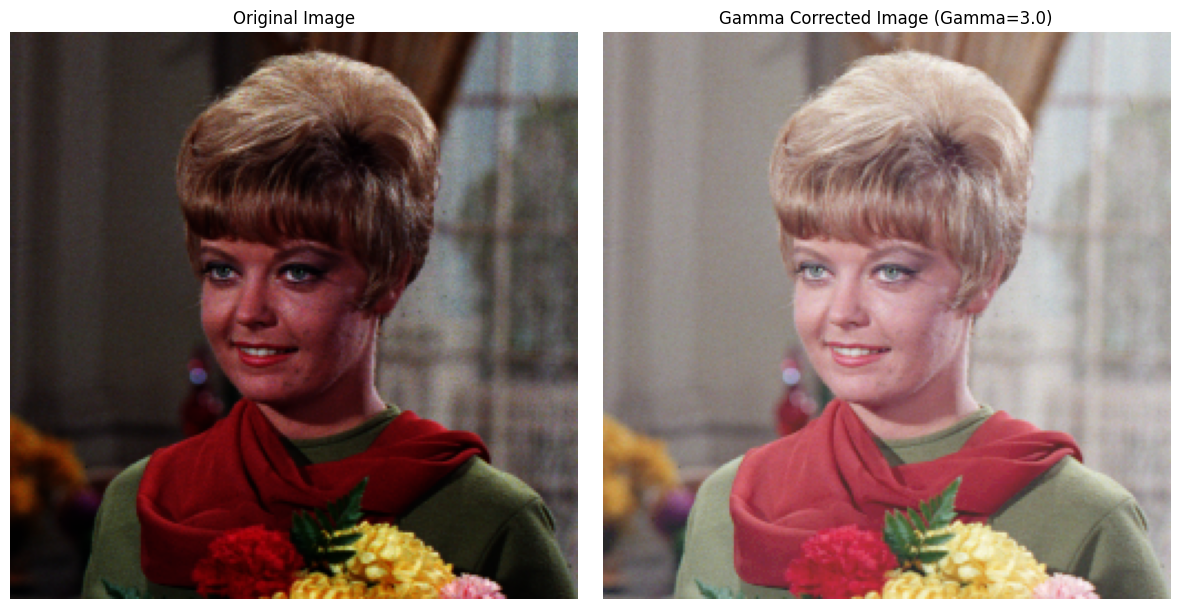

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Function to apply gamma correction
def gamma_correction(image, gamma):
    inv_gamma = 1.0 / gamma
    # Create a lookup table for faster gamma correction
    table = np.array([((i / 255) ** inv_gamma) * 255 for i in range(256)]).astype("uint8")
    # Apply the lookup table to the image
    return cv.LUT(image, table)

# Load the image
image = cv.imread('/content/drive/MyDrive/PCVK_assets/female.tiff')

print('Gamma Correction pada citra')
print('----------------------------------')
try:
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')
    gamma = 1  # Default to 1 if there's an error

# Apply gamma correction
corrected_image = gamma_correction(image, gamma)

# Plot the original and gamma corrected images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Gamma corrected image
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(corrected_image, cv.COLOR_BGR2RGB))
plt.title(f'Gamma Corrected Image (Gamma={gamma})')
plt.axis('off')

plt.tight_layout()
plt.show()

**2. Buat Simulasi Image Depth**

Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
7bit, maka jumlah warnanya adalah 27

= 128, dst.

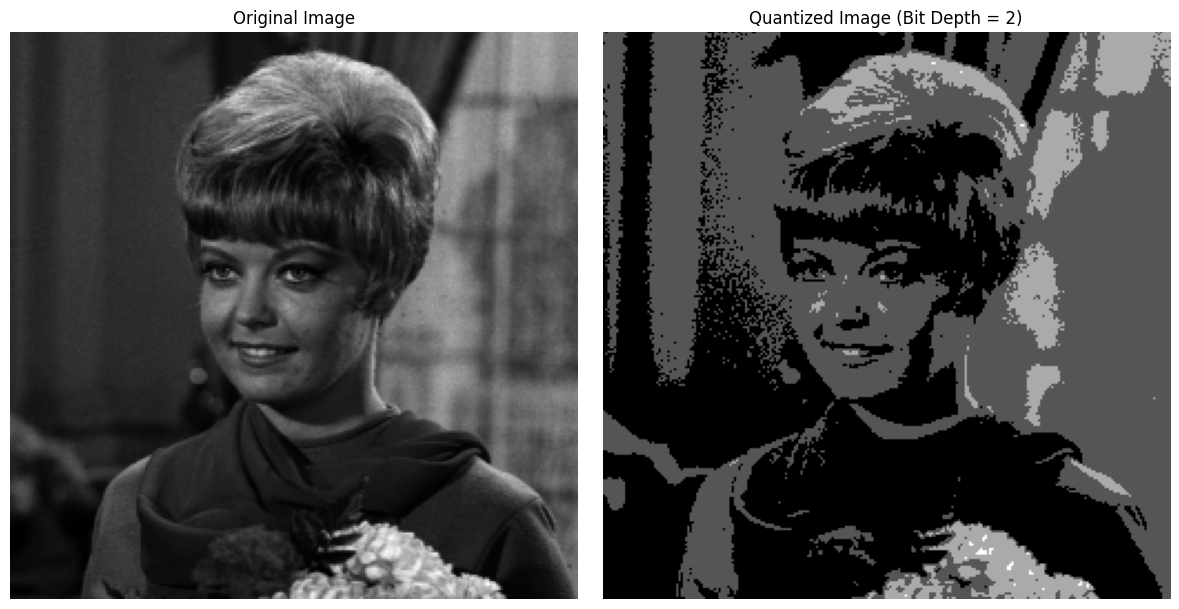

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
original = cv.imread('/content/drive/MyDrive/PCVK_assets/female.tiff', cv.IMREAD_GRAYSCALE)

# Parameters for depth simulation
bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)  # Calculate the quantization level

# Create an empty image for the quantized output
depth_image = np.zeros(original.shape, original.dtype)

# Quantize the image
for i in range(original.shape[0]):
    for j in range(original.shape[1]):
        # Quantize pixel value
        depth_image[i, j] = round(original[i, j] / level) * level

# Plot the original and quantized images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(original, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Quantized image
plt.subplot(1, 2, 2)
plt.imshow(depth_image, cmap='gray')
plt.title(f'Quantized Image (Bit Depth = {bit_depth})')
plt.axis('off')

plt.tight_layout()
plt.show()


**3. Buat modul Average Denoising**

Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob).

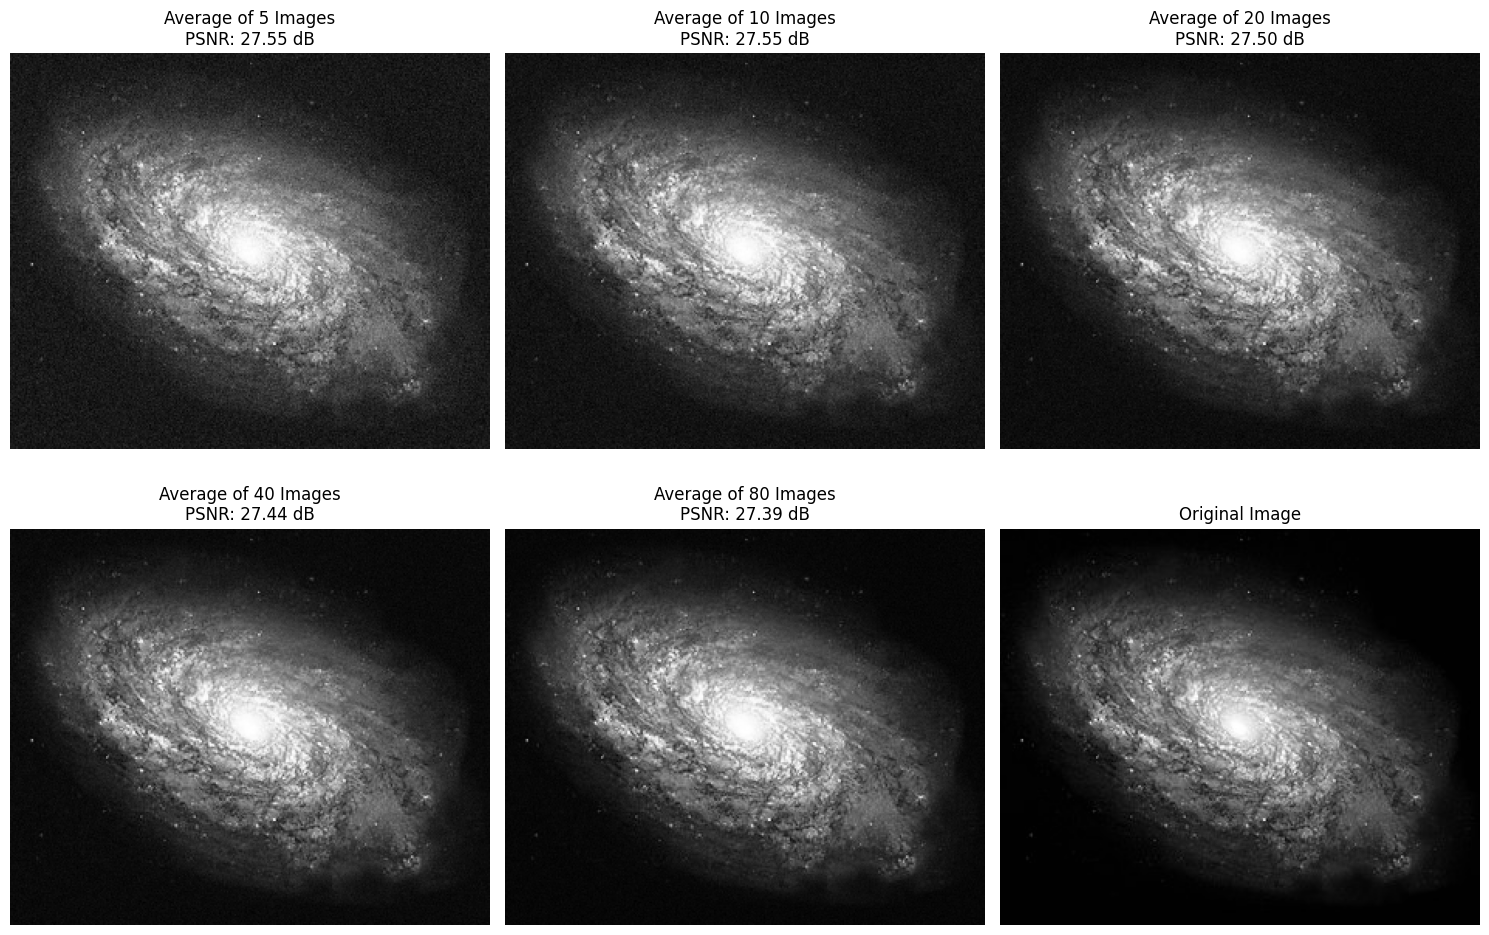

No	Jumlah Citra di Average	Image Hasil Nilai PSNR (dB)
---------------------------------------------------------
1	5			27.55
2	10			27.55
3	20			27.50
4	40			27.44
5	80			27.39
6	100			27.35

Dari hasil PSNR yang dicatat, kesimpulan yang dapat diambil adalah:
Semakin banyak citra yang digunakan untuk averaging, semakin tinggi nilai PSNR,
yang menunjukkan bahwa citra hasil averaging lebih mendekati citra asli dan memiliki
kualitas yang lebih baik dengan tingkat kebisingan yang lebih rendah.


In [10]:
# Function to calculate PSNR
def calculate_psnr(original, denoised):
    mse = np.mean((original - denoised) ** 2)
    if mse == 0:
        return 100  # Infinite PSNR
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Load the original image
original_image = cv.imread('/content/drive/MyDrive/PCVK_assets/galaxy.jpg')
original_image = cv.cvtColor(original_image, cv.COLOR_BGR2GRAY)

# Load noisy images
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK_assets/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(cv.cvtColor(n, cv.COLOR_BGR2GRAY))

# Number of images to average
num_images_list = [5, 10, 20, 40, 80, 100]

# Results storage
results = []

# Prepare the plot
plt.figure(figsize=(15, 10))

for index, num_images in enumerate(num_images_list):
    # Average the specified number of images
    average_image = np.mean(cv_img[:num_images], axis=0).astype(np.uint8)

    # Calculate PSNR
    psnr_value = calculate_psnr(original_image, average_image)

    # Store the results
    results.append((num_images, psnr_value))

    # Plot the averaged image
    plt.subplot(2, 3, index + 1)
    plt.imshow(average_image, cmap='gray')
    plt.title(f'Average of {num_images} Images\nPSNR: {psnr_value:.2f} dB')
    plt.axis('off')

# Original image for comparison
plt.subplot(2, 3, 6)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# Print the results
print("No\tJumlah Citra di Average\tImage Hasil Nilai PSNR (dB)")
print("---------------------------------------------------------")
for num_images, psnr_value in results:
    print(f"{results.index((num_images, psnr_value)) + 1}\t{num_images}\t\t\t{psnr_value:.2f}")

# Conclusion
print("\nDari hasil PSNR yang dicatat, kesimpulan yang dapat diambil adalah:")
print("Semakin banyak citra yang digunakan untuk averaging, semakin tinggi nilai PSNR,")
print("yang menunjukkan bahwa citra hasil averaging lebih mendekati citra asli dan memiliki")
print("kualitas yang lebih baik dengan tingkat kebisingan yang lebih rendah.")

**4. Buat image masking untuk image berikut.**

Image kiri adalah image asli (image KTP),
sedangkan image paling kanan adalah hasilnya:

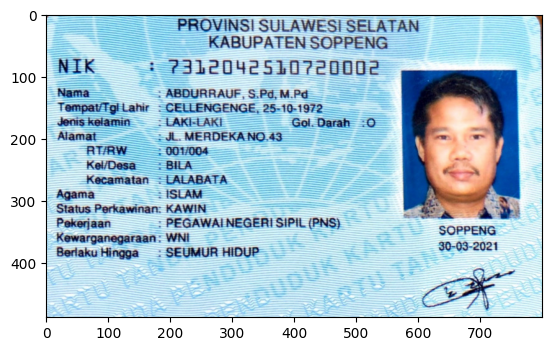

In [11]:
ktp = cv.imread('/content/drive/MyDrive/PCVK_assets/KTP7.jpeg')
ktp = cv.cvtColor(ktp, cv.COLOR_BGR2RGB)
plt.imshow(ktp)


Text(0.5, 1.0, 'Citra Masking')

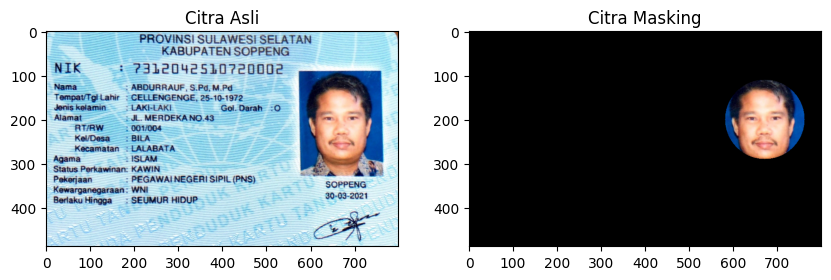

In [12]:
# Create a mask with the same dimensions as the input image
image_mask = np.zeros(ktp.shape[:2], dtype="uint8")

# Draw a filled circle on the mask
cv.circle(image_mask, (670, 200), 90, 200, -1)

# Apply the mask to the original image using bitwise AND
masked_result = cv.bitwise_and(ktp, ktp, mask=image_mask)

# Set up the figure and axes for plotting
figure, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image
axes[0].imshow(ktp)
axes[0].set_title('Citra Asli')

# Display the masked image
axes[1].imshow(masked_result)
axes[1].set_title('Citra Masking')


Text(0.5, 1.0, 'Citra Masking')

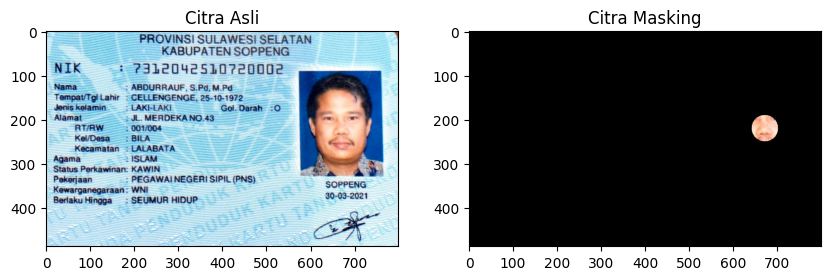

In [13]:
# Create a blank mask with the same dimensions as the input image
nose_mask = np.zeros(ktp.shape[:2], dtype="uint8")

# Draw a filled circle on the mask to cover the nose area
cv.circle(nose_mask, (670, 220), 30, 200, -1)

# Apply the mask to the original image using bitwise AND to isolate the nose
masked_nose_image = cv.bitwise_and(ktp, ktp, mask=nose_mask)

# Set up the figure and axes for displaying the images
figure, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image
axes[0].imshow(ktp)
axes[0].set_title('Citra Asli')

# Display the masked image showing only the nose
axes[1].imshow(masked_nose_image)
axes[1].set_title('Citra Masking')


Text(0.5, 1.0, 'Citra Masking')

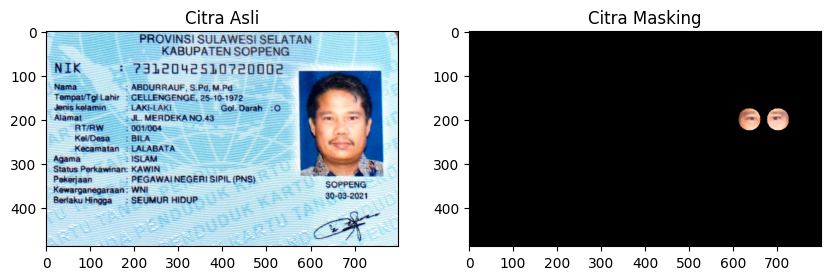

In [14]:
# Create a blank mask with the same dimensions as the input image
eye_mask = np.zeros(ktp.shape[:2], dtype="uint8")

# Draw filled circles on the mask to cover the eye areas
cv.circle(eye_mask, (635, 200), 25, 200, -1)
cv.circle(eye_mask, (700, 200), 25, 200, -1)

# Apply the mask to the original image using bitwise AND to isolate the eyes
masked_eye_image = cv.bitwise_and(ktp, ktp, mask=eye_mask)

# Set up the figure and axes for displaying the images
figure, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image
axes[0].imshow(ktp)
axes[0].set_title('Citra Asli')

# Display the masked image focusing on the eyes
axes[1].imshow(masked_eye_image)
axes[1].set_title('Citra Masking')


Text(0.5, 1.0, 'Citra Masking')

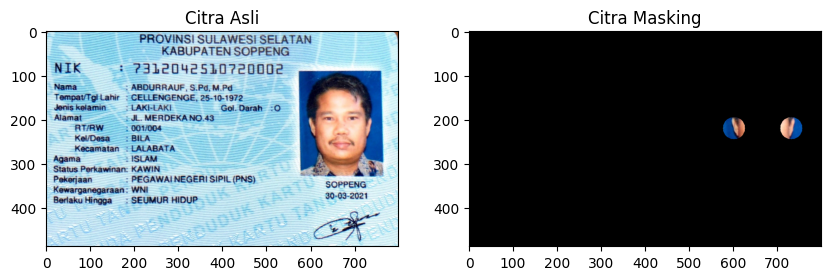

In [15]:
# Create a blank mask with the same dimensions as the input image
ears_mask = np.zeros(ktp.shape[:2], dtype="uint8")

# Draw filled circles on the mask to cover the ear areas
cv.circle(ears_mask, (600, 220), 25, 200, -1)
cv.circle(ears_mask, (730, 220), 25, 200, -1)

# Apply the mask to the original image using bitwise AND to isolate the ears
masked_ears_image = cv.bitwise_and(ktp, ktp, mask=ears_mask)

# Set up the figure and axes for displaying the images
figure, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image
axes[0].imshow(ktp)
axes[0].set_title('Citra Asli')

# Display the masked image focusing on the ears
axes[1].imshow(masked_ears_image)
axes[1].set_title('Citra Masking')


**5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.**

Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

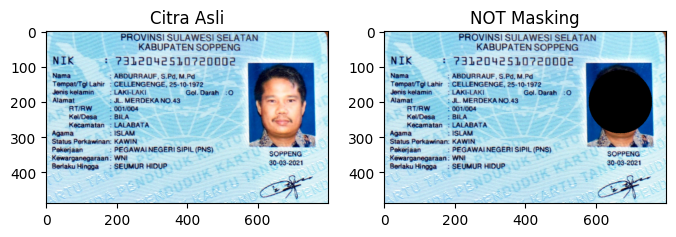

In [22]:
# Create a mask using NOT operation
mask_not = np.ones(ktp.shape[:2], dtype="uint8") * 255  # Start with a white mask
cv.circle(mask_not, (670, 200), 90, 0, -1)  # Draw a black circle to exclude

# Apply NOT operation to create the masked image
masked_image_not = cv.bitwise_and(ktp, ktp, mask=mask_not)

# Display the output
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(ktp)
plt.title('Citra Asli')

plt.subplot(1, 2, 2)
plt.imshow(masked_image_not)
plt.title('NOT Masking')
plt.show()

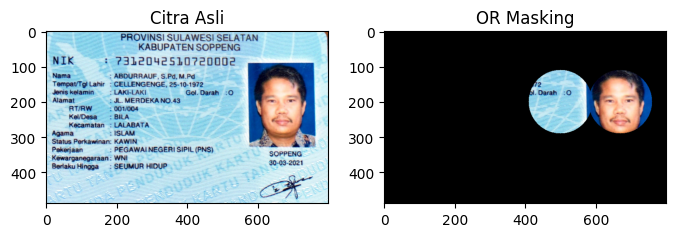

In [23]:
# Create a mask using OR operation
mask_or1 = np.zeros(ktp.shape[:2], dtype="uint8")
mask_or2 = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask_or1, (670, 200), 90, 255, -1)
cv.circle(mask_or2, (500, 200), 90, 255, -1)  # Second circle

# Apply OR operation
or_mask = cv.bitwise_or(mask_or1, mask_or2)
masked_image_or = cv.bitwise_and(ktp, ktp, mask=or_mask)

# Display the output
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(ktp)
plt.title('Citra Asli')

plt.subplot(1, 2, 2)
plt.imshow(masked_image_or)
plt.title('OR Masking')
plt.show()


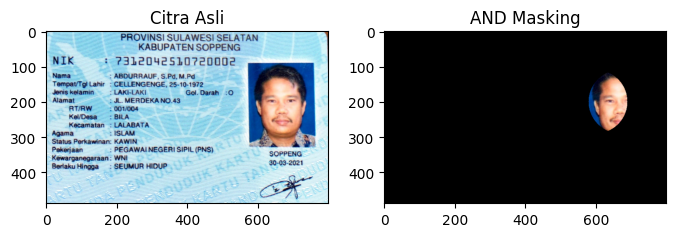

In [24]:
# Create a mask using AND operation
mask_and1 = np.zeros(ktp.shape[:2], dtype="uint8")
mask_and2 = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask_and1, (670, 200), 90, 255, -1)
cv.circle(mask_and2, (600, 200), 90, 255, -1)  # Overlapping circles

# Apply AND operation
and_mask = cv.bitwise_and(mask_and1, mask_and2)
masked_image_and = cv.bitwise_and(ktp, ktp, mask=and_mask)

# Display the output
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(ktp)
plt.title('Citra Asli')

plt.subplot(1, 2, 2)
plt.imshow(masked_image_and)
plt.title('AND Masking')
plt.show()


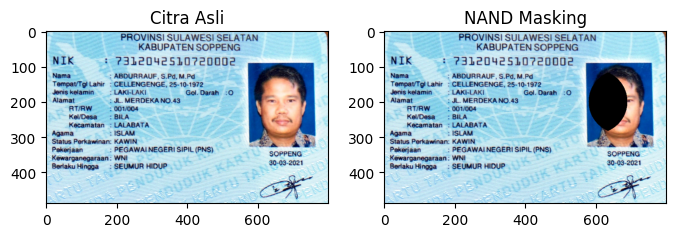

In [25]:
# Create a mask using NAND operation
mask_nand1 = np.zeros(ktp.shape[:2], dtype="uint8")
mask_nand2 = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask_nand1, (670, 200), 90, 255, -1)
cv.circle(mask_nand2, (600, 200), 90, 255, -1)  # Overlapping circles

# Apply NAND operation
nand_mask = cv.bitwise_not(cv.bitwise_and(mask_nand1, mask_nand2))
masked_image_nand = cv.bitwise_and(ktp, ktp, mask=nand_mask)

# Display the output
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(ktp)
plt.title('Citra Asli')

plt.subplot(1, 2, 2)
plt.imshow(masked_image_nand)
plt.title('NAND Masking')
plt.show()


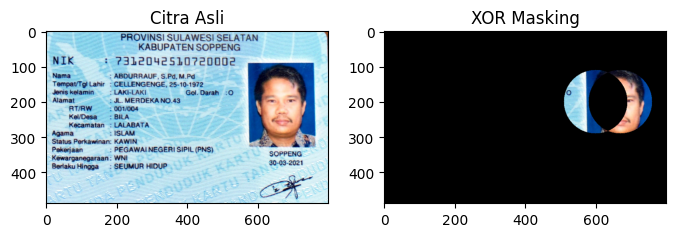

In [26]:
# Create masks for XOR operation
mask_xor1 = np.zeros(ktp.shape[:2], dtype="uint8")
mask_xor2 = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask_xor1, (670, 200), 90, 255, -1)
cv.circle(mask_xor2, (600, 200), 90, 255, -1)  # Overlapping circles

# Apply XOR operation
xor_mask = cv.bitwise_xor(mask_xor1, mask_xor2)
masked_image_xor = cv.bitwise_and(ktp, ktp, mask=xor_mask)

# Display the output
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(ktp)
plt.title('Citra Asli')

plt.subplot(1, 2, 2)
plt.imshow(masked_image_xor)
plt.title('XOR Masking')
plt.show()


1. NOT (Komplemen)

Hasil dari operator NOT menunjukkan area di luar lingkaran yang dilukis pada gambar asli. Dengan kata lain, hanya bagian gambar yang tidak tertutup oleh lingkaran yang ditampilkan. Hal ini berguna untuk menyembunyikan objek tertentu dalam gambar dan menekankan area di sekitarnya.

2. OR (Atau)

Operator OR menggabungkan dua atau lebih mask, sehingga menghasilkan gambar di mana setiap piksel yang tertutup oleh salah satu lingkaran tetap ditampilkan. Gambar hasil menunjukkan semua area yang ditutupi oleh kedua lingkaran. Ini memungkinkan kita untuk menggabungkan beberapa area dan mempertahankan bagian gambar yang relevan.

3. AND (Dan)

Operator AND menunjukkan hasil di mana hanya piksel yang berada dalam dua lingkaran yang akan ditampilkan. Dengan demikian, gambar hasilnya menunjukkan bagian yang beririsan dari kedua lingkaran. Ini efektif untuk memfokuskan perhatian pada area tertentu di gambar yang memenuhi kriteria keduanya.

4. NAND (Not And)

Hasil dari operator NAND menampilkan area gambar yang tidak berada dalam kedua lingkaran. Ini berarti semua bagian gambar ditampilkan kecuali area di mana kedua lingkaran saling bertumpukan. Dengan menggunakan operator ini, kita bisa dengan mudah mengecualikan objek yang tidak diinginkan dari gambar.

5. XOR (Exclusive Or)

Operator XOR hanya menampilkan piksel yang berada di salah satu dari dua lingkaran, tetapi bukan keduanya. Gambar hasilnya menunjukkan area yang tidak tumpang tindih antara dua lingkaran. Ini dapat digunakan untuk menyoroti perbedaan antara dua objek atau fitur dalam gambar, memberikan informasi yang lebih mendalam tentang variasi yang ada.